<a href="https://colab.research.google.com/github/adre76/Projeto-DAeA/blob/main/projeto_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

Carregando o dataset de machine learning

In [3]:
dados = pd.read_csv('Dataset\mbti.csv', sep='^([^,]+),', engine='python')
dados.columns = ['vazio', 'type', 'posts']
dados.drop(columns='vazio', inplace=True)

#dados = dados.iloc[0], dados.iloc[: , 1] + dados.iloc[: , 2]
#type(dados)


Gráfico com a contagem de tipos MBTI no dataset

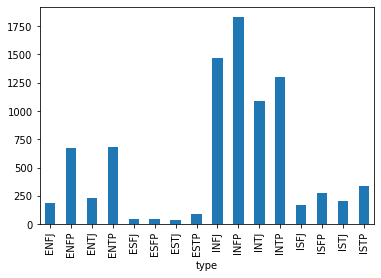

In [4]:
dados.groupby('type').posts.count().plot.bar()
plt.show()

Pré processamento:
Criando a coluna de ID dos tipos de código MBTI

In [5]:
dados['type_id'] = dados['type'].factorize()[0]
type_id_df = dados[['type', 'type_id']].drop_duplicates().sort_values('type_id')
type_to_id = dict(type_id_df.values)
id_to_type = dict(type_id_df[['type_id', 'type']].values)
labels = dados.type_id

Separando o dataset para o aprendizado

In [6]:
posts = dados["posts"]
classificacoes = dados["type"]

Parametrizando a função de aprendizado de texto do SKLearn e convertendo os posts em arrays numéricos.

In [7]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [8]:
features = tfidf.fit_transform(posts).toarray()
features.shape

(8674, 149851)

Agora, cada uma das 8674 narrativas é representada por 149851 recursos (features), representando a pontuação tf-idf para diferentes unigramas e bigramas.

Usando sklearn.feature_selection.chi2 para encontrar os termos que estão mais correlacionados com cada classificação MBTI:

In [14]:
N = 2
for type, type_id in sorted(type_to_id.items()):
  features_chi2 = chi2(features, labels == type_id)
  indices = np.argsort(features_chi2[0])
  # feature_names = np.array(tfidf.get_feature_names())[indices]
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigramas = [v for v in feature_names if len(v.split(' ')) == 1]
  bigramas = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(type))
  print("  . Unigramas mais correlacionados:\n. {}".format('\n. '.join(unigramas[-N:])))
  print("  . Bigramas mais correlacionados:\n. {}".format('\n. '.join(bigramas[-N:])))
  print("__________________________________________\n")

# 'ENFJ':
  . Unigramas mais correlacionados:
. enfj
. enfjs
  . Bigramas mais correlacionados:
. healthy enfj
. fellow enfj
__________________________________________

# 'ENFP':
  . Unigramas mais correlacionados:
. enfps
. enfp
  . Bigramas mais correlacionados:
. fellow enfp
. know enfp
__________________________________________

# 'ENTJ':
  . Unigramas mais correlacionados:
. entjs
. entj
  . Bigramas mais correlacionados:
. fellow entjs
. entj forum
__________________________________________

# 'ENTP':
  . Unigramas mais correlacionados:
. entps
. entp
  . Bigramas mais correlacionados:
. entp female
. know entp
__________________________________________

# 'ESFJ':
  . Unigramas mais correlacionados:
. lenabelle
. esfjs
  . Bigramas mais correlacionados:
. esfj guys
. just esfjs
__________________________________________

# 'ESFP':
  . Unigramas mais correlacionados:
. heathers
. digger
  . Bigramas mais correlacionados:
. extp tmlt
. memory talon
_________________________________

To Do: Treinar e testar

To Do: Criar entrada de texto e submeter para a IA